In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
# Define positive and negative classes
positive_points = np.array([(-2, 3), (0, 1), (2, -1)])
negative_points = np.array([(-2, 1), (0, -1), (2, -3)])

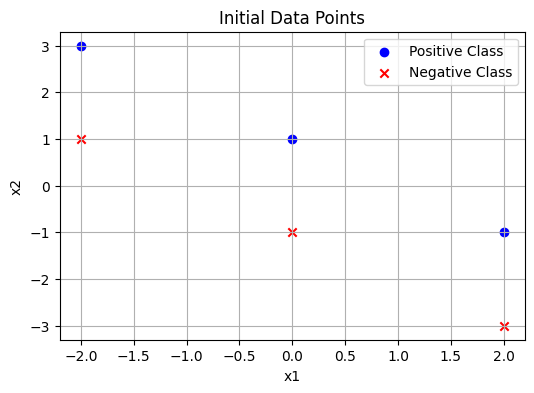

In [3]:
# Plot initial data points
plt.figure(figsize=(6, 4))
plt.scatter(positive_points[:, 0], positive_points[:, 1], color='blue', marker='o', label='Positive Class')
plt.scatter(negative_points[:, 0], negative_points[:, 1], color='red', marker='x', label='Negative Class')
plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Initial Data Points')
plt.grid(True)
plt.show()

In [4]:
# Comine all the points and labels
x = np.vstack((positive_points, negative_points))
y = np.array([1] * len(positive_points) + [-1] * len(negative_points))

In [6]:
# Perceptron Algorithm
def perceptron(X, y, steps=10):
    theta = np.zeros(X.shape[1])
    theta0 = 0

    for t in range(steps):
        for i, xi in enumerate(X):
            if y[i] * (np.dot(xi, theta) + theta0) <= 0:
                theta += y[i] * xi
                theta0 += y[i]
                break

        # plot after each run
        plot_decision_boundary(theta, theta0, t+1)

    return theta, theta0

In [ ]:
# Plotting the decision boundary for each run
def plot_decision_boundary(theta, theta0, iteration):
    plt.figure(figsize=(6,4))
    plt.scatter(positive_points[:, 0], positive_points[:, 1], color='blue', marker='o', label='Positive Class')
    plt.scatter(negative_points[:, 0], negative_points[:, 1], color='red', marker='x', label='Negative Class')
    
    # Plot boundary
    x_values = np.linspace(-3, 3, 2)
    # check for the theta0 to avoid devision by zero in case of a vertical line
    if theta[1] != 0:
        y_values = -(theta[0] * x_values + theta0) / theta[1]
        plt.plot(x_values, y_values, label=f'Iteration {iteration}')
    else:
        # plot the vertical line
        x_val = -theta0 / theta[0]
        plt.axvline(x=x_val, label=f'Iteration {iteration}')

    plt.xlim(-3, 3)
    plt.ylim(-4, 4)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Decision Boundary at Iteration {iteration}')
    plt.legend()
    plt.grid(True)
    plt.show()

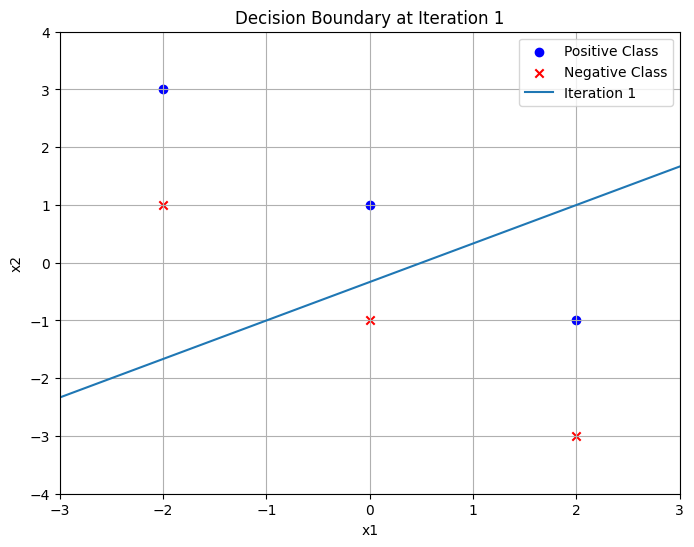

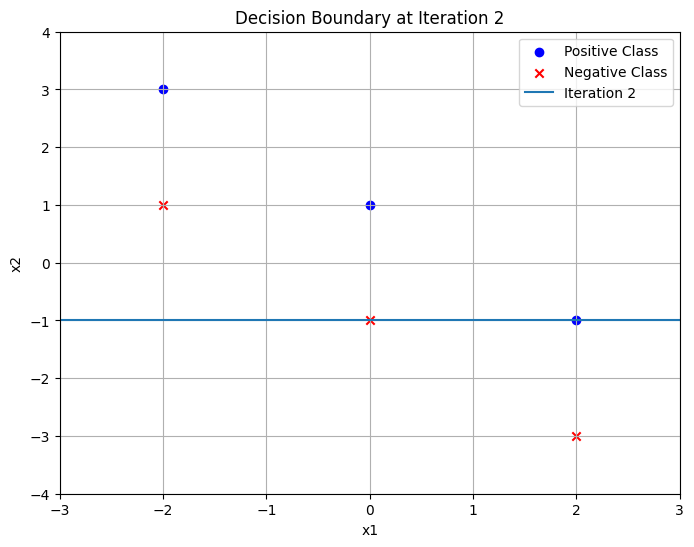

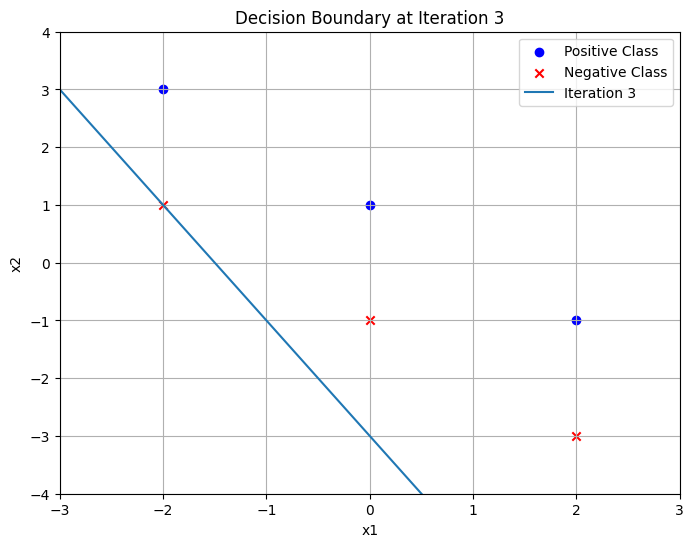

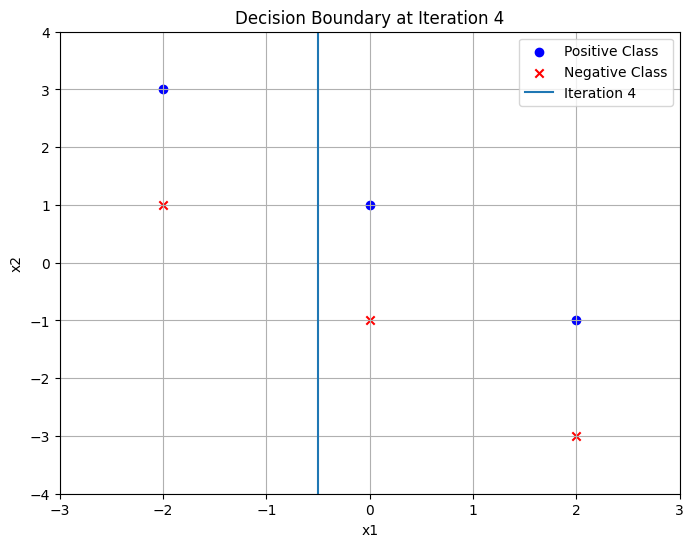

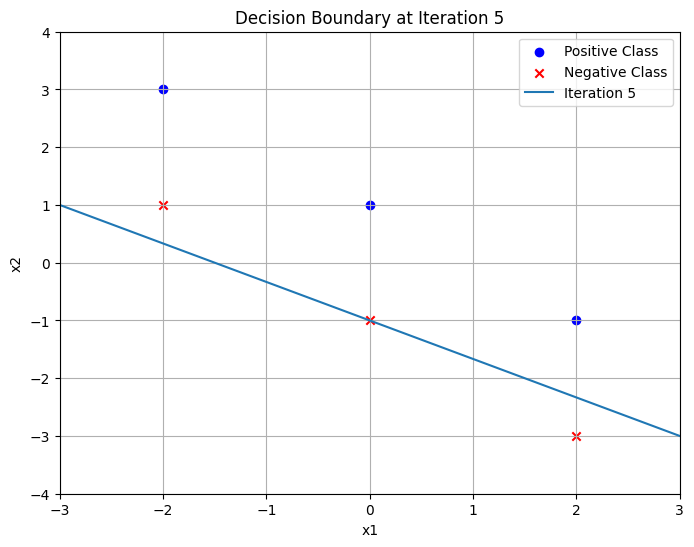

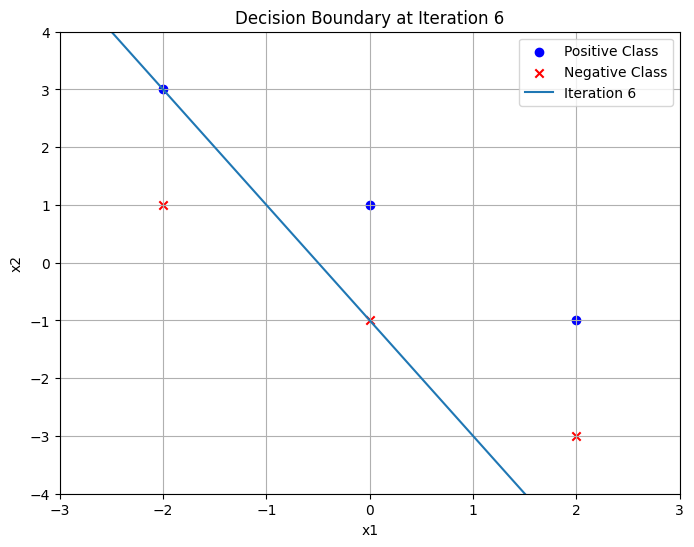

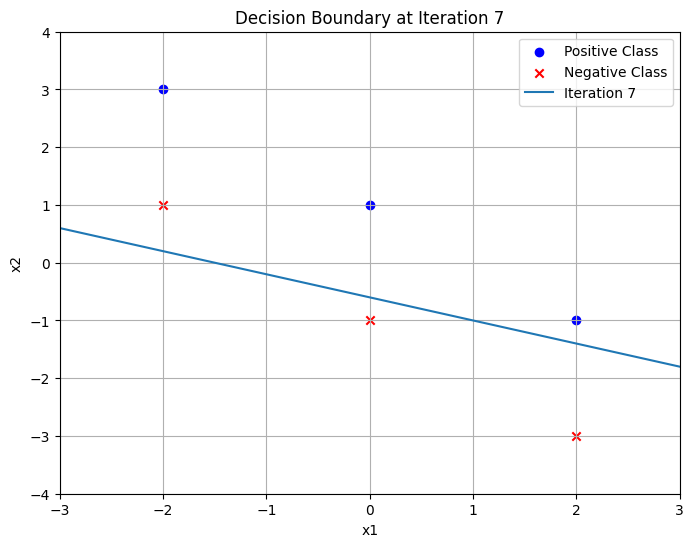

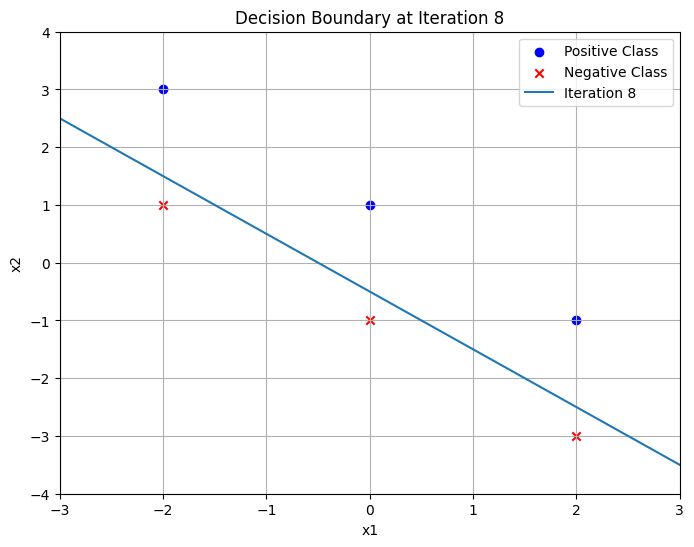

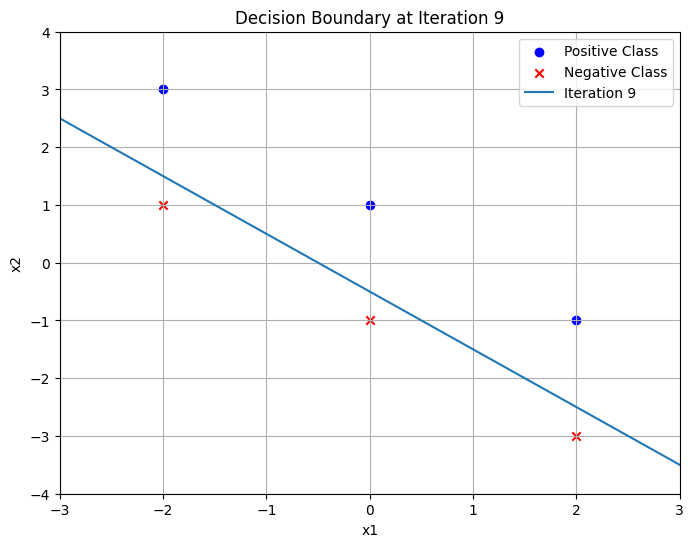

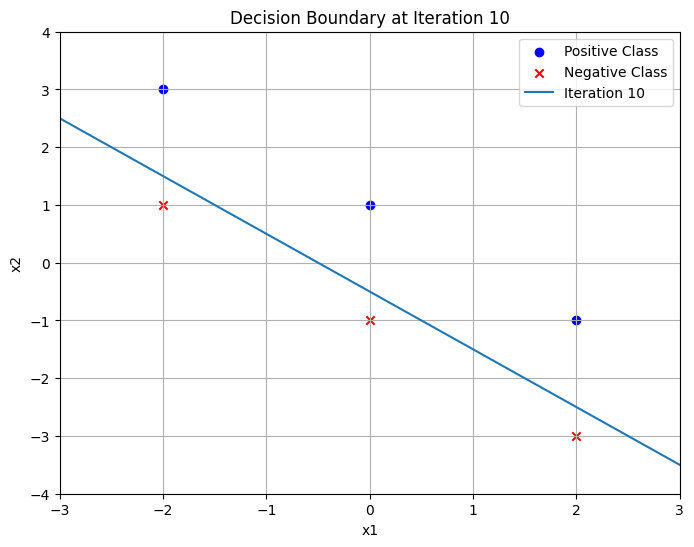

In [10]:
theta_final, theta0_final = perceptron(x, y, 10)